In [1]:
# %matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
# import seaborn as sns


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.facecolor'] = (1,1,1,1)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date
import datetime

saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [2]:
# # import PandemiXFunctions as pf
# # pf.rnTime
# import sys
# sys.path.append('../scripts/')
# # from PandemiXFunctions import rnTime,rnMean

# # rnTime([1,2,3,4,5,6,7,8,9],7)
# # rnMean([1,2,3,4,5,6,7,8,9],7)


# import PandemiXFunctions
# # PandemiXFunctions.rn
# PandemiXFunctions

In [3]:
# Define paths
rootdir_data = os.getcwd() +"/../DanskeData/" 

path_data = rootdir_data + "ssi_data/"
path_dash = rootdir_data + "ssi_dashboard/"
path_vacc = rootdir_data + "ssi_vacc/"

path_figs = os.getcwd() +"/../Figures/" 

# Vaccination-by-age 
# Start with vaccination overview

Since age-structured data for third dose is not available, it has to be estimated from cases and incidence.

In [4]:



for k in range(0,7):
    dayToCheck = np.datetime64('today')-np.timedelta64(k,'D')
    thisWeekDay = (dayToCheck).astype(datetime.datetime).isoweekday()    
    if (thisWeekDay == 2):
        tuePath = 'SSI_data_'+str(dayToCheck)

In [5]:
# Data is (only) in the file from the most recent tuesday. 
# Should be made smarter, but here hardcoded
# tuePath = 'SSI_data_2022-01-25'
# Now automatic finding of latest tuesday:
for k in range(0,7):
    dayToCheck = np.datetime64('today')-np.timedelta64(k,'D')
    thisWeekDay = (dayToCheck).astype(datetime.datetime).isoweekday()    
    if (thisWeekDay == 2):
        tuePath = 'SSI_data_'+str(dayToCheck)

        dirPath = path_data + tuePath + '/'
        if (os.path.exists(dirPath) == False):
            tuePath = 'SSI_data_'+str(dayToCheck-np.timedelta64(7,'D'))
            dirPath = path_data + tuePath + '/'

print(f'Path to latest Tuesday was {tuePath}')


df1 = pd.read_csv(dirPath+'gennembrudsinfektioner_table1.csv',delimiter=';')

df2_C = pd.read_csv(dirPath+'gennembrudsinfektioner_table2_antal_cases.csv',delimiter=';')
df2_H = pd.read_csv(dirPath+'gennembrudsinfektioner_table2_antal_indlagte.csv',delimiter=';')
df2_D = pd.read_csv(dirPath+'gennembrudsinfektioner_table2_antal_dode.csv',delimiter=';')
df2_R = pd.read_csv(dirPath+'gennembrudsinfektioner_table2_antal_repositive.csv',delimiter=';')
df2_Int = pd.read_csv(dirPath+'gennembrudsinfektioner_table2_antal_intensiv.csv',delimiter=';')
df2_T = pd.read_csv(dirPath+'gennembrudsinfektioner_table2_antal_tests.csv',delimiter=';')

df3 = pd.read_csv(dirPath+'gennembrudsinfektioner_table2_incidence_alle.csv',delimiter=';',decimal=",")
df3_C = pd.read_csv(dirPath+'gennembrudsinfektioner_table2_incidence_cases.csv',delimiter=';',decimal=",")
df3_H = pd.read_csv(dirPath+'gennembrudsinfektioner_table2_incidence_indlagte.csv',delimiter=';',decimal=",")
df3_D = pd.read_csv(dirPath+'gennembrudsinfektioner_table2_incidence_dode.csv',delimiter=';',decimal=",")
df3_Int = pd.read_csv(dirPath+'gennembrudsinfektioner_table2_incidence_intensiv.csv',delimiter=';',decimal=",")
df3_T = pd.read_csv(dirPath+'gennembrudsinfektioner_table2_incidence_tests.csv',delimiter=';',decimal=",")

Path to latest Tuesday was SSI_data_2022-04-05


In [6]:
# Since order was wrong in the beginning of 2022, we first need the correct order...
# weekNames = df.År.astype(str)+'-W'+df.Uge.apply(lambda x: f"{int(x):02d}")

import datetime
weekDTs = [np.datetime64(datetime.datetime.strptime(d[-4:] + '-W'+d[4:6]+'-1', "%Y-W%W-%w")) for d in df1.Ugenummer]

curOrder = np.argsort(weekDTs)
curOrder

# df3_C
# df2_D
        
sNone = 'Ingen vaccination'        
sOne = 'Første vaccination'  
sTwo = 'Anden vaccination'
sFull = 'Fuld effekt efter primært forløb'   
sReva = 'Fuld effekt efter revaccination'


ageGroups = df2_C.Aldersgruppe.values
print(ageGroups)
# weekNames = df1.Ugenummer
weekNames = df1.Ugenummer.values[curOrder]
weekNamesShort = [x[4:6] for x in weekNames]
wInt = [int(x[4:6]) for x in weekNames]
wIntRange = np.arange(len(wInt))

allDates = np.array(weekDTs)[curOrder]
print(weekNames)

['0-5' '6-11' '12-15' '16-19' '20-29' '30-39' '40-49' '50-59' '60-64'
 '65-69' '70-79' '80+' '12+' 'Alle']
['Uge 50-2021' 'Uge 51-2021' 'Uge 52-2021' 'Uge 01-2022' 'Uge 02-2022'
 'Uge 03-2022' 'Uge 04-2022' 'Uge 05-2022' 'Uge 06-2022' 'Uge 07-2022'
 'Uge 08-2022' 'Uge 09-2022' 'Uge 10-2022' 'Uge 11-2022' 'Uge 12-2022'
 'Uge 13-2022']


In [7]:
# df2_C

In [8]:
# Make function for gettings particular parts
def getTimeSeries(thisdf=df2_C,curStatus='Ingen vaccination',curAge='Alle',weekNames=weekNames):
    
    agedf = thisdf[thisdf.Aldersgruppe==curAge]
    allVals = []
    for curWeek in weekNames:
        toAdd = agedf[curWeek+'_'+curStatus].values[0]
        allVals.append(toAdd)
    allVals = np.array(allVals)

    return allVals

print(getTimeSeries(df2_H,sNone))
print(getTimeSeries(df2_H,sFull))

[282 317 357 347 438 518 526 600 631 552 393 305 207 173 126  83]
[364 358 463 404 393 464 495 468 508 407 325 234 169 130  92  83]


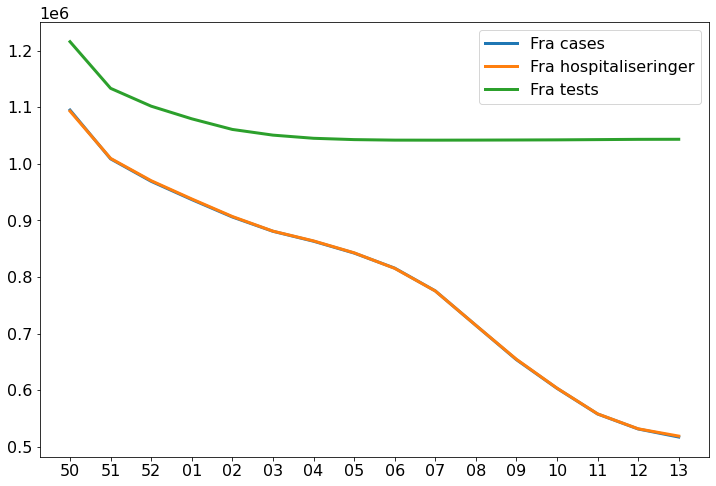

In [9]:

plt.figure()

curCase = getTimeSeries(df2_C,sNone)
curInci = getTimeSeries(df3_C,sNone)
plt.plot(weekNamesShort,100000*curCase/curInci,label='Fra cases')

curCase = getTimeSeries(df2_H,sNone)
curInci = getTimeSeries(df3_H,sNone)
plt.plot(weekNamesShort,100000*curCase/curInci,label='Fra hospitaliseringer')

curCase = getTimeSeries(df2_T,sNone)
curInci = getTimeSeries(df3_T,sNone)
plt.plot(weekNamesShort,100000*curCase/curInci,label='Fra tests')

plt.legend()

In [10]:
def getCountFromCases(curStatus='Ingen vaccination',curAge='Alle',weekNames=weekNames): 
    # curCase = getTimeSeries(df2_C,curStatus,curAge,weekNames)
    # curInci = getTimeSeries(df3_C,curStatus,curAge,weekNames)
    curCase = getTimeSeries(df2_T,curStatus,curAge,weekNames)
    curInci = getTimeSeries(df3_T,curStatus,curAge,weekNames)

    countEsti = 100000 * curCase / curInci 
    return countEsti


(0.0, 4987969.372754637)

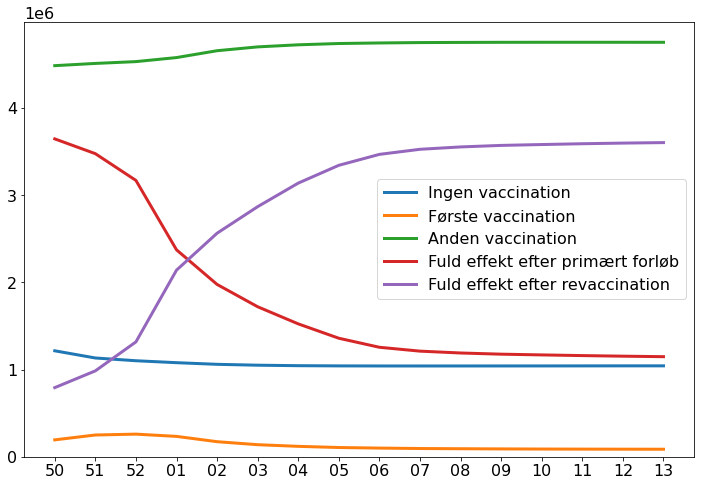

In [11]:
# sNone = 'Ingen vaccination'        
# sOne = 'Første vaccination'  
# sTwo = 'Anden vaccination'
# sFull = 'Fuld effekt efter primært forløb'   
# sReva = 'Fuld effekt efter revaccination'

fig,ax1 = plt.subplots()

ax1.plot(weekNamesShort,getCountFromCases(sNone),label=sNone)
ax1.plot(weekNamesShort,getCountFromCases(sOne),label=sOne)
ax1.plot(weekNamesShort,getCountFromCases(sTwo),label=sTwo)
ax1.plot(weekNamesShort,getCountFromCases(sFull),label=sFull)
ax1.plot(weekNamesShort,getCountFromCases(sReva),label=sReva) 
ax1.legend()

ax1.set_ylim(bottom=0)

In [12]:
ageGroups

array(['0-5', '6-11', '12-15', '16-19', '20-29', '30-39', '40-49',
       '50-59', '60-64', '65-69', '70-79', '80+', '12+', 'Alle'],
      dtype=object)

C:\Users\rakrpe\AppData\Local\Temp\ipykernel_56024\932457292.py:7: RuntimeWarning: invalid value encountered in true_divide
  countEsti = 100000 * curCase / curInci


(18901.0, 19087.0)

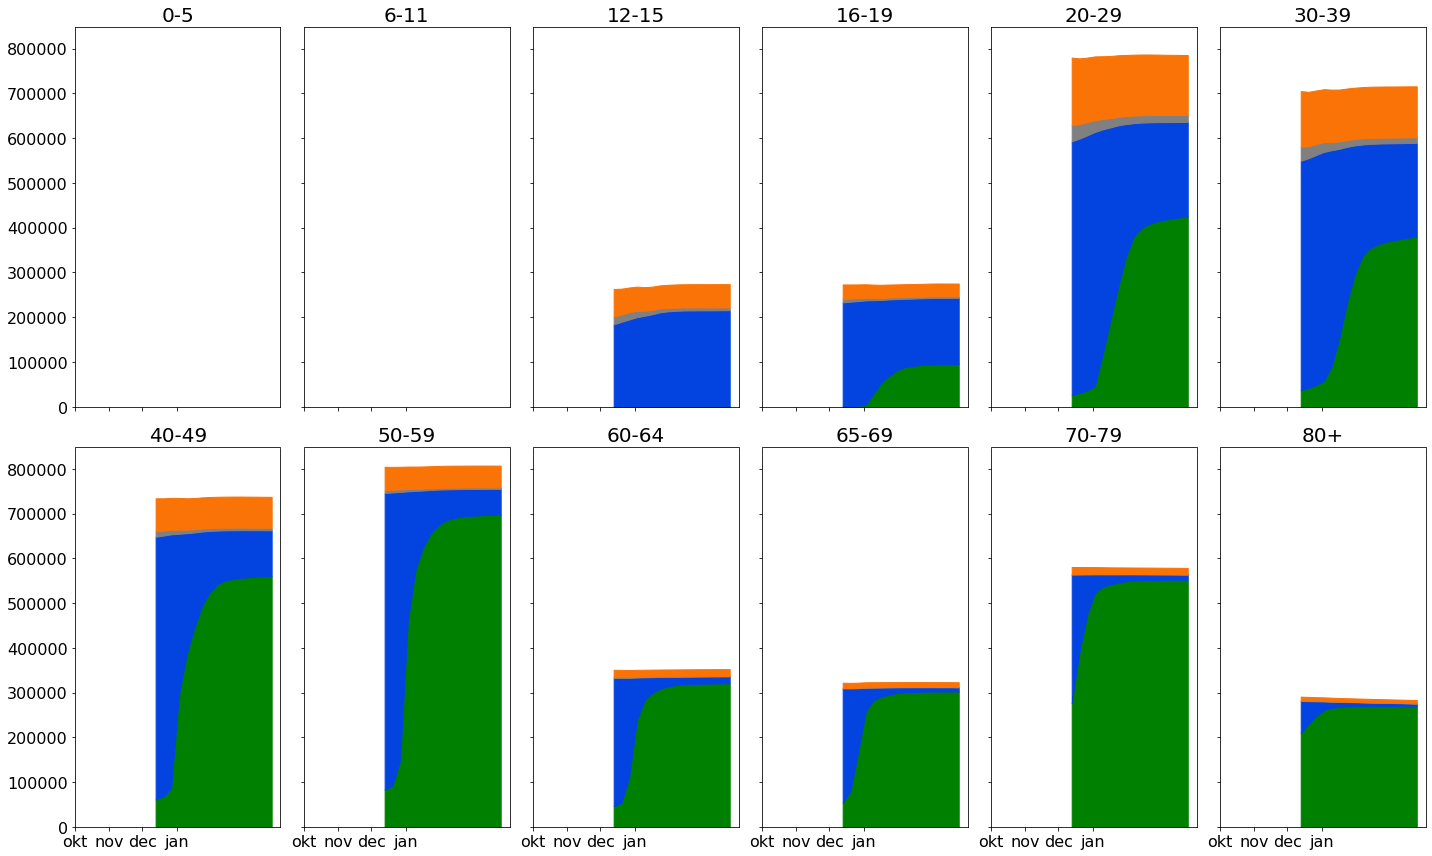

In [13]:
# Recreation of Kristoffer Bæk's figure
# fig,ax1 = plt.subplots() 
fig,allAxes = plt.subplots(2,6,figsize=(20,12),sharey=True,sharex=True,tight_layout=True)


 
thisAge = ageGroups[8]

for i in range(len(allAxes.flatten())):
    ax1 = allAxes.flatten()[i]
    thisAge = ageGroups[i]
    ax1.set_title(thisAge)

    curTotCount = 0 * getCountFromCases(sNone,curAge=thisAge)
    prevTotCount = curTotCount

    # curTotCount = curTotCount + getCountFromCases(sNone,curAge=thisAge)
    # ax1.plot(weekNamesShort,curTotCount,label=sNone)

    # curTotCount = curTotCount + getCountFromCases(sOne,curAge=thisAge)
    # ax1.plot(weekNamesShort,curTotCount,label=sOne) 

    # ax1.plot(weekNamesShort,curTotCount+getCountFromCases(sTwo,curAge=thisAge),label=sTwo) 

    # curTotCount = curTotCount + getCountFromCases(sFull,curAge=thisAge)
    # ax1.plot(weekNamesShort,curTotCount,label=sFull) 

    # curTotCount = curTotCount + getCountFromCases(sReva,curAge=thisAge)
    # ax1.plot(weekNamesShort,curTotCount,label=sReva) 

    # ax1.fill_between(allDates,getCountFromCases(sTwo,curAge=thisAge)+getCountFromCases(sOne,curAge=thisAge)+getCountFromCases(sNone,curAge=thisAge))

    curTotCount = curTotCount + getCountFromCases(sReva,curAge=thisAge)
    # ax1.plot(allDates,curTotCount,label=sReva,color='g')
    ax1.fill_between(allDates,curTotCount,prevTotCount,label=sReva,color='g')
    prevTotCount = curTotCount

    curTotCount = curTotCount + getCountFromCases(sFull,curAge=thisAge)
    # ax1.plot(allDates,curTotCount,label=sFull,color='b') 
    ax1.fill_between(allDates,curTotCount,prevTotCount,label=sFull,color='xkcd:blue') 
    prevTotCount = curTotCount

    curTotCount = curTotCount + getCountFromCases(sOne,curAge=thisAge)
    # ax1.plot(allDates,curTotCount,label=sOne,color='grey') 
    ax1.fill_between(allDates,curTotCount,prevTotCount,label=sOne,color='grey') 
    prevTotCount = curTotCount

    curTotCount = curTotCount + getCountFromCases(sNone,curAge=thisAge)
    # ax1.plot(allDates,curTotCount,label=sNone,color='orange') 
    ax1.fill_between(allDates,curTotCount,prevTotCount,label=sNone,color='xkcd:orange') 
    prevTotCount = curTotCount

    # ax1.plot(weekNamesShort,getCountFromCases(sNone),label=sNone)
    # ax1.plot(weekNamesShort,getCountFromCases(sOne),label=sOne)
    # ax1.plot(weekNamesShort,getCountFromCases(sTwo),label=sTwo)
    # ax1.plot(weekNamesShort,getCountFromCases(sFull),label=sFull)
    # ax1.plot(weekNamesShort,getCountFromCases(sReva),label=sReva) 

ax1.set_ylim(bottom=0)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
curXticks = np.arange(np.datetime64('2021-10'),np.datetime64('2022-02'))
ax1.set_xticks(curXticks)
ax1.set_xlim(right=np.datetime64('today'))


# Previous cases, as in age-structured notebook

In [14]:

latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir
latestdir

dfAge = pd.read_csv(latestdir+'\\Regionalt_DB\\18_fnkt_alder_uge_testede_positive_nyindlagte.csv',delimiter=';',encoding='latin1',dtype=str)
dfAge['Nyindlagte pr. 100.000 borgere'] = pd.to_numeric(dfAge['Nyindlagte pr. 100.000 borgere'].str.replace(',','.'))
dfAge['Positive pr. 100.000 borgere'] = pd.to_numeric(dfAge['Positive pr. 100.000 borgere'].str.replace(',','.'))
dfAge['Testede pr. 100.000 borgere'] = pd.to_numeric(dfAge['Testede pr. 100.000 borgere'].str.replace(',','.'))
dfAge['Antal testede'] = pd.to_numeric(dfAge['Antal testede'])
dfAge['Antal positive'] = pd.to_numeric(dfAge['Antal positive'])

dfAge.tail(18)

,Uge,Aldersgruppe,Testede pr. 100.000 borgere,Positive pr. 100.000 borgere,Nyindlagte pr. 100.000 borgere,Antal testede,Antal positive
985,2022-U12,00-02,315,62,9.1,1173,231
986,2022-U12,03-05,464,49,0.5,1740,185
987,2022-U12,06-11,645,62,0.4,4730,453
988,2022-U12,12-15,721,104,1.8,3932,570
989,2022-U12,16-19,823,108,1.3,4512,593
990,2022-U12,20-39,1404,240,3.5,41839,7163
991,2022-U12,40-64,1919,393,7.1,72484,14833
992,2022-U12,65-79,1870,484,22.7,33828,8754
993,2022-U12,80+,2559,415,57.8,14972,2429
994,2022-U13,00-02,241,34,5.6,898,125


In [15]:
# Calculate dates
import datetime
weekDTs = [np.datetime64(datetime.datetime.strptime(d[:4] + '-W'+d[6:8]+'-1', "%Y-W%W-%w")) for d in dfAge.Uge]
dfAge['Dato'] = weekDTs



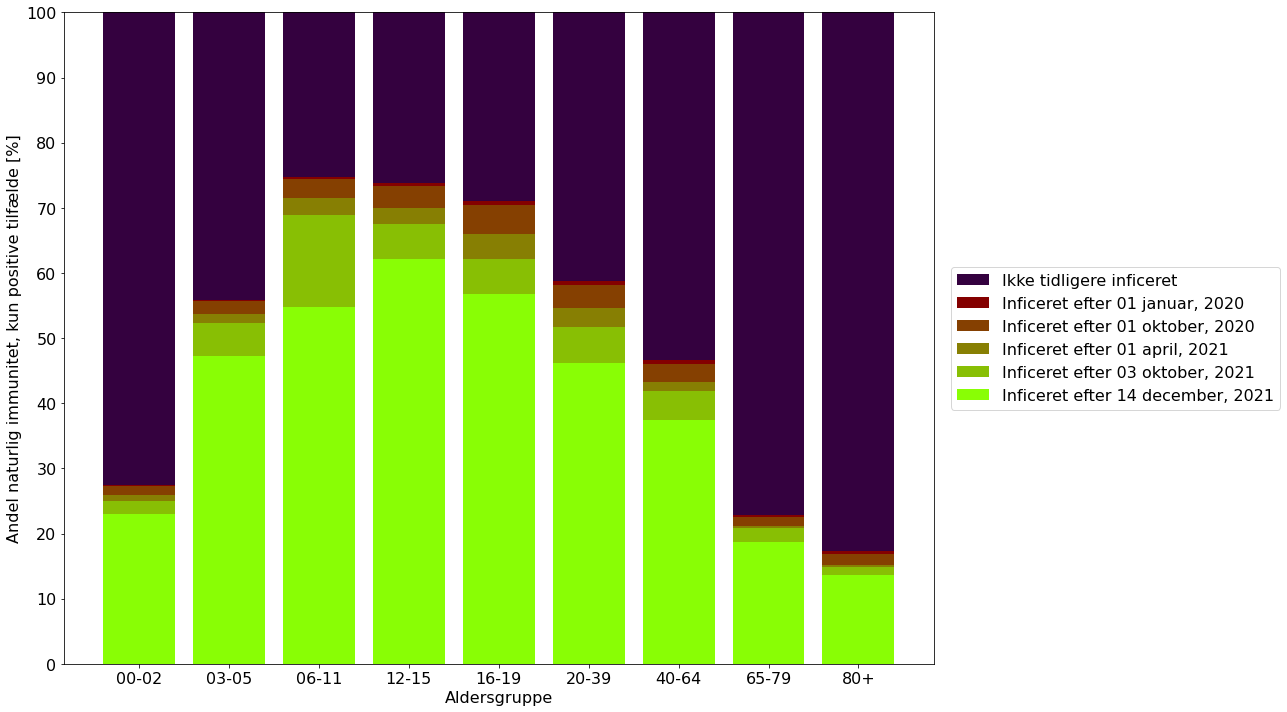

In [16]:
# asdf = np.cumsum((thisdf['Positive pr. 100.000 borgere'].values)[::-1])/1000
# plt.figure()
# plt.plot(thisdf.Dato.values[::-1],asdf)

# tSpanRange = [np.timedelta64(x,'M') for x in [-3,-6,-12]]
# tSpanRange = [np.timedelta64(x,'M') for x in [-18,-12,-6,-3]]
# tSpanRange = [np.timedelta64(x*30,'D') for x in [-18,-12,-6,-3]]
tSpanRange = [np.timedelta64(x*30,'D') for x in [-18,-14,-6,-3]]
tSpanDates = np.datetime64('today') + tSpanRange
tSpanDates = [np.datetime64(x) for x in [
            '2020-01-01',
            '2020-10-01',
            '2021-04-01',
            '2021-10-03',
            '2021-12-14',
            # '2022-01-14',
            ]]


# cdict = {
#   'red'  :  ( (0.0, 0.25, .25), (0.02, .59, .59), (1., 1., 1.)),
#   'green':  ( (0.0, 0.0, 0.0), (0.02, .45, .45), (1., .97, .97)),
# }

# import matplotlib
# # cm = matplotlib.colors.LinearSegmentedColormap('my_colormap', {'g','r'}, 3)
# cm = matplotlib.colors.LinearSegmentedColormap('my_colormap', cdict, 3)

import matplotlib
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["xkcd:dark red","xkcd:lime green"],N=len(tSpanDates))

# plt.figure()
fig,ax1 = plt.subplots(figsize=(18,10))

uniAge = dfAge.Aldersgruppe.unique()
for i in range(len(uniAge)):
    curAge = uniAge[i]
    ax1.bar(i,100,color='xkcd:dark violet',label=int(i==0)*'Ikke tidligere inficeret')

    for k in range(0,len(tSpanDates)):
        thisdf = dfAge[dfAge.Aldersgruppe == curAge]
        # curEarlyT = tSpanRange[k]
        # df_period = thisdf[(thisdf.Dato -curEarlyT )>= np.datetime64('today')]
        curFirstDate = tSpanDates[k]
        df_period = thisdf[thisdf.Dato >= curFirstDate]

        curSum = df_period['Positive pr. 100.000 borgere'].sum()/1000

        # latestDateOfInf = np.datetime64('today')+curEarlyT
        latestDateOfInf = curFirstDate
        # ax1.bar(i,curSum,color=cmap(k),label=int(i==0)*('Inficeret efter '+f'{latestDateOfInf}'))
        ax1.bar(i,curSum,color=cmap(k),label=int(i==0)*('Inficeret efter '+pd.to_datetime(tSpanDates[k]).strftime("%d %B, %Y")))
# curSum



# ax1.legend()

ax1.legend(bbox_to_anchor=(1.01,0.5),loc='center left')
ax1.set_xticks(np.arange(len(uniAge)))
ax1.set_xticklabels(uniAge)

ax1.set_yticks(np.arange(0,110,10))
ax1.set_ylim([0,100])

ax1.set_ylabel('Andel naturlig immunitet, kun positive tilfælde [%]')
ax1.set_xlabel('Aldersgruppe')

# fig,ax2 = plt.subplots(figsize=(13,6.5))

# fig.patch.set_facecolor('xkcd:off white')
# # ax1.set_facecolor('xkcd:off white')
# ax2.set_facecolor('xkcd:off white')

# for curAge in dfAge.Aldersgruppe.unique():
#     thisdf = dfAge[dfAge.Aldersgruppe == curAge]

#     ax2.plot(thisdf.Dato,np.cumsum(thisdf['Positive pr. 100.000 borgere'])/1000,'.-',label=curAge)

fig.tight_layout()

if saveFigures:
    fig.savefig(path_figs+'/Immunity/NaturalImmunity')

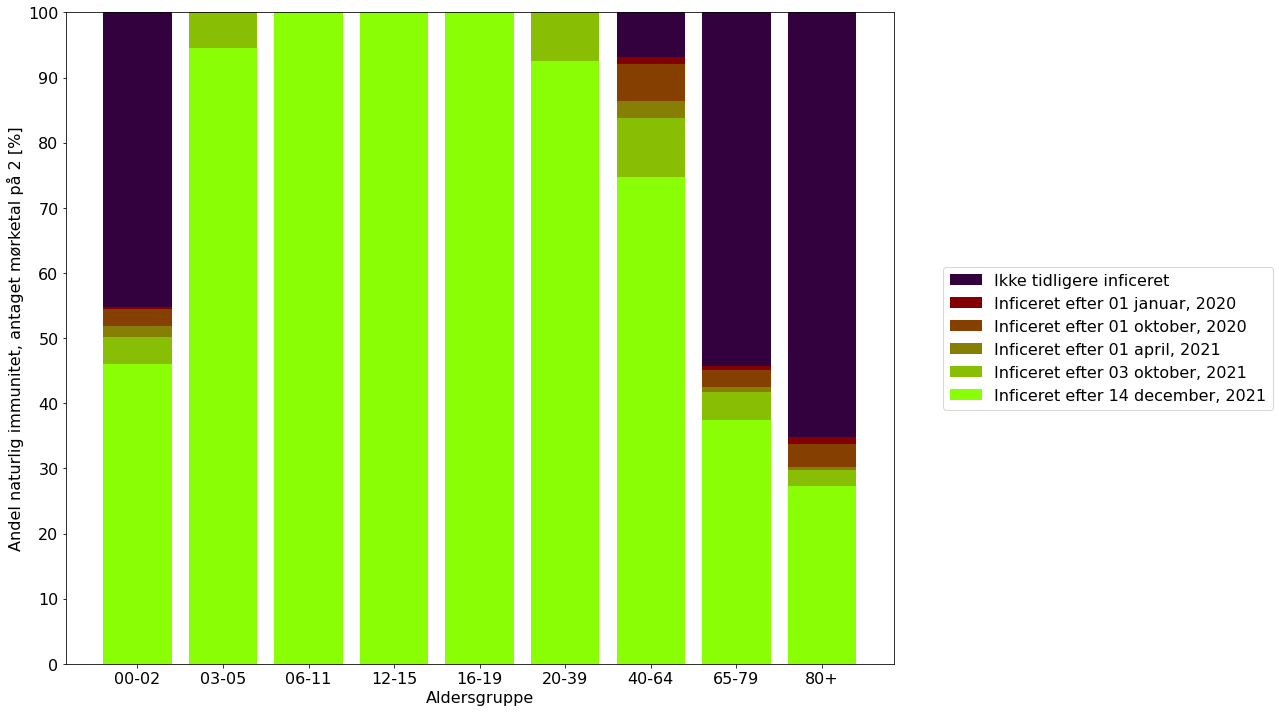

In [17]:
# asdf = np.cumsum((thisdf['Positive pr. 100.000 borgere'].values)[::-1])/1000
# plt.figure()
# plt.plot(thisdf.Dato.values[::-1],asdf)

# tSpanRange = [np.timedelta64(x,'M') for x in [-3,-6,-12]]
# tSpanRange = [np.timedelta64(x,'M') for x in [-18,-12,-6,-3]]
# tSpanRange = [np.timedelta64(x*30,'D') for x in [-18,-12,-6,-3]]
tSpanRange = [np.timedelta64(x*30,'D') for x in [-18,-14,-6,-3]]
tSpanDates = np.datetime64('today') + tSpanRange
tSpanDates = [np.datetime64(x) for x in [
            '2020-01-01',
            '2020-10-01',
            '2021-04-01',
            '2021-10-03',
            '2021-12-14',
            # '2022-01-14',
            ]]


import matplotlib
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["xkcd:dark red","xkcd:lime green"],N=len(tSpanDates))

# plt.figure()
fig,ax1 = plt.subplots(figsize=(18,10))

uniAge = dfAge.Aldersgruppe.unique()
for i in range(len(uniAge)):
    curAge = uniAge[i]
    ax1.bar(i,100,color='xkcd:dark violet',label=int(i==0)*'Ikke tidligere inficeret')

    for k in range(0,len(tSpanDates)):
        thisdf = dfAge[dfAge.Aldersgruppe == curAge]
        # curEarlyT = tSpanRange[k]
        # df_period = thisdf[(thisdf.Dato -curEarlyT )>= np.datetime64('today')]
        curFirstDate = tSpanDates[k]
        df_period = thisdf[thisdf.Dato >= curFirstDate]

        curSum = 2* df_period['Positive pr. 100.000 borgere'].sum()/1000

        # latestDateOfInf = np.datetime64('today')+curEarlyT
        latestDateOfInf = curFirstDate
        # ax1.bar(i,curSum,color=cmap(k),label=int(i==0)*('Inficeret efter '+f'{latestDateOfInf}'))
        ax1.bar(i,curSum,color=cmap(k),label=int(i==0)*('Inficeret efter '+pd.to_datetime(tSpanDates[k]).strftime("%d %B, %Y")))
# curSum



# ax1.legend()
ax1.legend(bbox_to_anchor=(1.05,0.5),loc='center left')
ax1.set_xticks(np.arange(len(uniAge)))
ax1.set_xticklabels(uniAge)

ax1.set_yticks(np.arange(0,110,10))
ax1.set_ylim([0,100])

ax1.set_ylabel('Andel naturlig immunitet, antaget mørketal på 2 [%]')
ax1.set_xlabel('Aldersgruppe')

fig.tight_layout()

if saveFigures:
    fig.savefig(path_figs+'/Immunity/NaturalImmunity_Doubled')


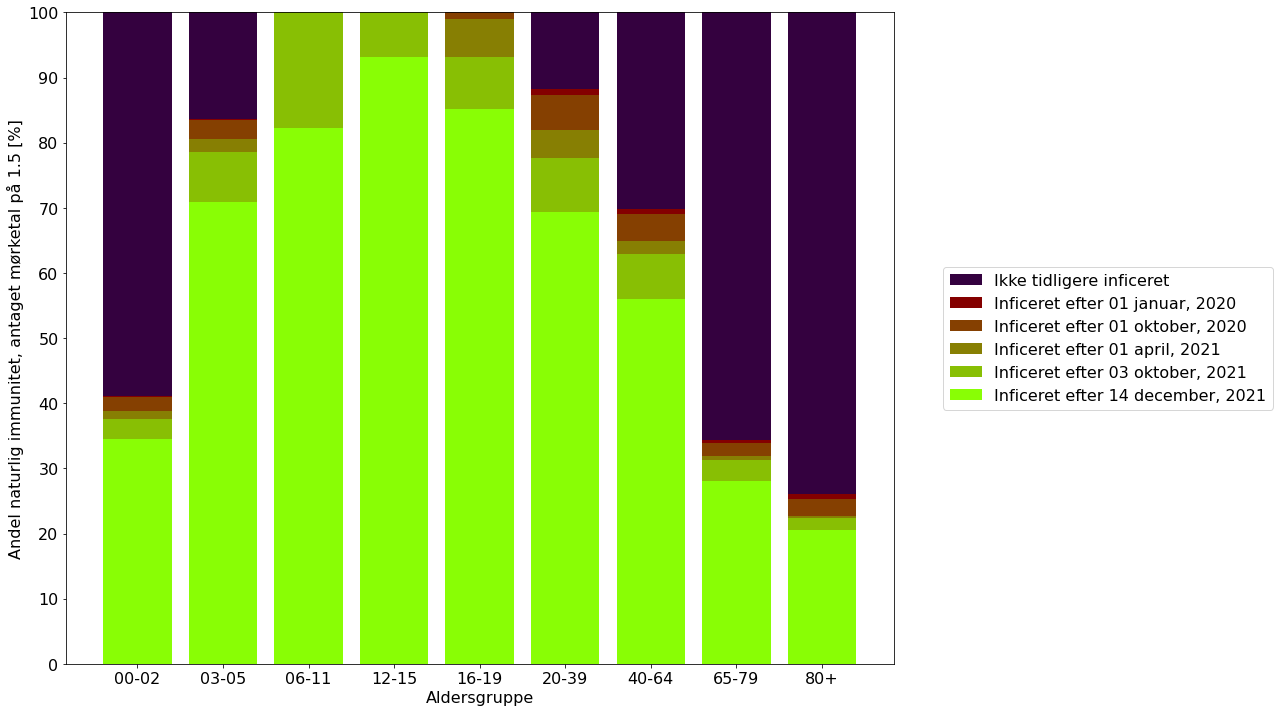

In [18]:
# asdf = np.cumsum((thisdf['Positive pr. 100.000 borgere'].values)[::-1])/1000
# plt.figure()
# plt.plot(thisdf.Dato.values[::-1],asdf)

# tSpanRange = [np.timedelta64(x,'M') for x in [-3,-6,-12]]
# tSpanRange = [np.timedelta64(x,'M') for x in [-18,-12,-6,-3]]
# tSpanRange = [np.timedelta64(x*30,'D') for x in [-18,-12,-6,-3]]
tSpanRange = [np.timedelta64(x*30,'D') for x in [-18,-14,-6,-3]]
tSpanDates = np.datetime64('today') + tSpanRange
tSpanDates = [np.datetime64(x) for x in [
            '2020-01-01',
            '2020-10-01',
            '2021-04-01',
            '2021-10-03',
            '2021-12-14',
            # '2022-01-14',
            ]]


import matplotlib
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["xkcd:dark red","xkcd:lime green"],N=len(tSpanDates))

# plt.figure()
fig,ax1 = plt.subplots(figsize=(18,10))

uniAge = dfAge.Aldersgruppe.unique()
for i in range(len(uniAge)):
    curAge = uniAge[i]
    ax1.bar(i,100,color='xkcd:dark violet',label=int(i==0)*'Ikke tidligere inficeret')

    for k in range(0,len(tSpanDates)):
        thisdf = dfAge[dfAge.Aldersgruppe == curAge]
        # curEarlyT = tSpanRange[k]
        # df_period = thisdf[(thisdf.Dato -curEarlyT )>= np.datetime64('today')]
        curFirstDate = tSpanDates[k]
        df_period = thisdf[thisdf.Dato >= curFirstDate]

        curSum = 1.5* df_period['Positive pr. 100.000 borgere'].sum()/1000

        # latestDateOfInf = np.datetime64('today')+curEarlyT
        latestDateOfInf = curFirstDate
        # ax1.bar(i,curSum,color=cmap(k),label=int(i==0)*('Inficeret efter '+f'{latestDateOfInf}'))
        ax1.bar(i,curSum,color=cmap(k),label=int(i==0)*('Inficeret efter '+pd.to_datetime(tSpanDates[k]).strftime("%d %B, %Y")))
# curSum



# ax1.legend()

ax1.legend(bbox_to_anchor=(1.05,0.5),loc='center left')
ax1.set_xticks(np.arange(len(uniAge)))
ax1.set_xticklabels(uniAge)

ax1.set_yticks(np.arange(0,110,10))
ax1.set_ylim([0,100])

ax1.set_ylabel('Andel naturlig immunitet, antaget mørketal på 1.5 [%]')
ax1.set_xlabel('Aldersgruppe')

fig.tight_layout()

if saveFigures:
    fig.savefig(path_figs+'/Immunity/NaturalImmunity_50percentExtra')


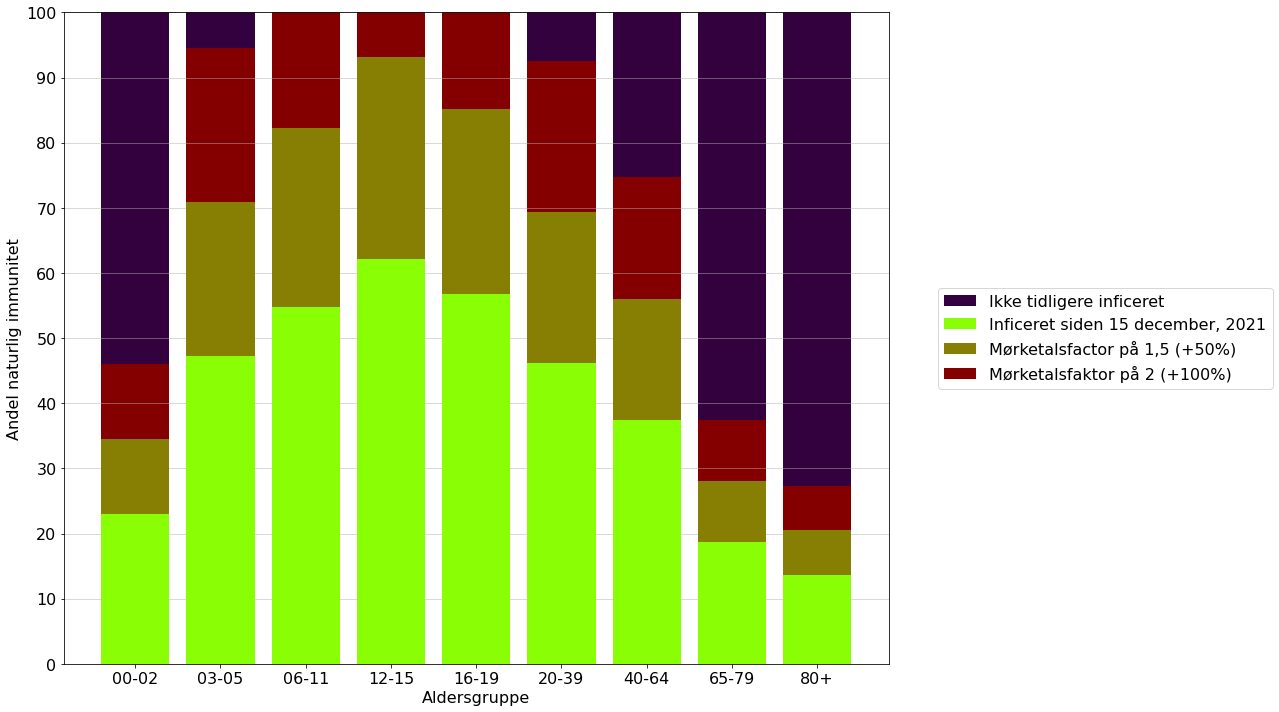

In [19]:
# asdf = np.cumsum((thisdf['Positive pr. 100.000 borgere'].values)[::-1])/1000
# plt.figure()
# plt.plot(thisdf.Dato.values[::-1],asdf)

# tSpanRange = [np.timedelta64(x,'M') for x in [-3,-6,-12]]
# tSpanRange = [np.timedelta64(x,'M') for x in [-18,-12,-6,-3]]
# tSpanRange = [np.timedelta64(x*30,'D') for x in [-18,-12,-6,-3]]
# tSpanRange = [np.timedelta64(x*30,'D') for x in [-18,-14,-6,-3]]
# tSpanDates = np.datetime64('today') + tSpanRange
# tSpanDates = [np.datetime64(x) for x in [
#             '2021-12-15',
#             ]]

tSpanDate = np.datetime64('2021-12-15')

import matplotlib
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["xkcd:dark red","xkcd:lime green"],N=len(tSpanDates))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["xkcd:dark red","xkcd:lime green"],N=3)

# plt.figure()
fig,ax1 = plt.subplots(figsize=(18,10))

uniAge = dfAge.Aldersgruppe.unique()
for i in range(len(uniAge)):
    curAge = uniAge[i]
    ax1.bar(i,100,color='xkcd:dark violet',label=int(i==0)*'Ikke tidligere inficeret')

    thisdf = dfAge[dfAge.Aldersgruppe == curAge]
    
    df_period = thisdf[thisdf.Dato >= tSpanDate]

    curSum = df_period['Positive pr. 100.000 borgere'].sum()/1000

    ax1.bar(i,curSum,color=cmap(2),label=int(i==0)*('Inficeret siden '+pd.to_datetime(tSpanDate).strftime("%d %B, %Y")),zorder=3)
    ax1.bar(i,1.5*curSum,color=cmap(1),label=int(i==0)*('Mørketalsfactor på 1,5 (+50%)'),zorder=2)
    ax1.bar(i,2*curSum,color=cmap(0),label=int(i==0)*('Mørketalsfaktor på 2 (+100%)'),zorder=1)

#     for k in range(0,len(tSpanDates)):
#         thisdf = dfAge[dfAge.Aldersgruppe == curAge]
#         # curEarlyT = tSpanRange[k]
#         # df_period = thisdf[(thisdf.Dato -curEarlyT )>= np.datetime64('today')]
#         curFirstDate = tSpanDates[k]
#         df_period = thisdf[thisdf.Dato >= curFirstDate]

#         curSum = 1.5* df_period['Positive pr. 100.000 borgere'].sum()/1000

#         # latestDateOfInf = np.datetime64('today')+curEarlyT
#         latestDateOfInf = curFirstDate
#         # ax1.bar(i,curSum,color=cmap(k),label=int(i==0)*('Inficeret efter '+f'{latestDateOfInf}'))
#         ax1.bar(i,curSum,color=cmap(k),label=int(i==0)*('Inficeret efter '+pd.to_datetime(tSpanDates[k]).strftime("%B, %Y")))
# # curSum


ax1.grid(axis='y',alpha=0.6)
ax1.legend(bbox_to_anchor=(1.05,0.5),loc='center left')
ax1.set_xticks(np.arange(len(uniAge)))
ax1.set_xticklabels(uniAge)

ax1.set_yticks(np.arange(0,110,10))
ax1.set_ylim([0,100])

ax1.set_ylabel('Andel naturlig immunitet')
ax1.set_xlabel('Aldersgruppe')

fig.tight_layout()

if saveFigures:
    fig.savefig(path_figs+'/Immunity/NaturalImmunity_Omikron')


In [20]:
# latestsubdir = list(os.walk(path_data))[0][1][-1]
# latestdir = path_data + latestsubdir
# latestdir


# df = pd.read_csv(latestdir+'\\gennembrudsinfektioner_table1.csv',delimiter=';',dtype=str)
# # df = pd.read_csv(latestdir+'\\gennembrudsinfektioner_table2_antal_cases.csv',delimiter=';',encoding='latin1',dtype=str)
# df

In [21]:

# latestsubdir = list(os.walk(path_dash))[0][1][-1]
# latestdir = path_dash + latestsubdir
# latestdir

# dfAge = pd.read_csv(latestdir+'\\Regionalt_DB\\18_fnkt_alder_uge_testede_positive_nyindlagte.csv',delimiter=';',encoding='latin1',dtype=str)
# dfAge['Nyindlagte pr. 100.000 borgere'] = pd.to_numeric(dfAge['Nyindlagte pr. 100.000 borgere'].str.replace(',','.'))
# dfAge['Positive pr. 100.000 borgere'] = pd.to_numeric(dfAge['Positive pr. 100.000 borgere'].str.replace(',','.'))
# dfAge['Testede pr. 100.000 borgere'] = pd.to_numeric(dfAge['Testede pr. 100.000 borgere'].str.replace(',','.'))
# dfAge['Antal testede'] = pd.to_numeric(dfAge['Antal testede'])
# dfAge['Antal positive'] = pd.to_numeric(dfAge['Antal positive'])

# dfAge.tail(18)